# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# citipy dependency
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [209]:
# Dependencies
import json
import os
import pandas as pd
import requests
import matplotlib.pyplot as plt
import random
import datetime

from api_keys import weather_api_key, g_key
from scipy import stats
from citipy import citipy
from datetime import date

# Seeding
seed = random.seed(69)

# Date
today = date.today()

In [135]:
# citipy setup
cities = []

random.seed(69)
while len(cities) < 1500:
    # randomly selects lat and long
    random_lat = random.uniform(-90, 90)
    random_long = random.uniform(-180, 180)
    
    # add to the cities list
    city = citipy.nearest_city(random_lat, random_long)
    cities.append(city.city_name)

## Generate Cities List

In [139]:
# Dict for all cities
cities_dict = {
    "City": cities
}

# cities df
cities_df = pd.DataFrame(cities_dict)

# unique cities
unique_cities = cities_df["City"].unique()
unique_cities_df = pd.DataFrame(unique_cities)
num_unique_cities = len(unique_cities)
num_unique_cities

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [192]:
# openweather url
units = "&units=imperial"
openweather_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&q="

present_city = []
lat = []
lon = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

# Loop through the weather api with each city on the list
for city in unique_cities:
    weather_response = requests.get(openweather_url + city + units).json()
    try:
        lat.append(weather_response['coord']['lat'])
        lon.append(weather_response['coord']['lon'])
        max_temp.append(weather_response['main']['temp_max'])
        humidity.append(weather_response['main']['humidity'])
        cloudiness.append(weather_response['clouds']['all'])
        wind_speed.append(weather_response['wind']['speed'])
        country.append(weather_response['sys']['country'])
        date.append(weather_response['dt']) # must append the city list at the end to avoid unwanted appends!
        present_city.append(city)
        print(f"{city} found!")
    # Missing cities are filtered out
    except KeyError: 
        print(f"{city} data missing")
        pass

kahului found!
port alfred found!
narrabri found!
fevralsk data missing
broome found!
panlaitan found!
saldanha found!
sao jose da coroa grande found!
caravelas found!
rikitea found!
mahebourg found!
lasa found!
datong found!
ushuaia found!
tazovskiy found!
avarua found!
vaini found!
castro found!
cape town found!
azovo found!
hasaki found!
saleaula data missing
le port found!
tuktoyaktuk found!
victoria found!
buenos aires found!
albany found!
yellowknife found!
cap malheureux found!
lida found!
fortuna found!
nador found!
new norfolk found!
tilichiki found!
yeppoon found!
nouadhibou found!
faanui found!
kunya found!
mahaicony data missing
bluff found!
talnakh found!
barrow found!
sentyabrskiy data missing
nikolskoye found!
kabare found!
funadhoo found!
busselton found!
kodiak found!
taolanaro data missing
berlevag found!
mushie found!
kapaa found!
nechi found!
butaritari found!
fene found!
nalut found!
iskateley found!
araripina found!
arraial do cabo found!
dikson found!
mar del pla

banjar found!
longlac data missing
barra do garcas found!
omboue found!
tumannyy data missing
san policarpo found!
muriwai beach found!
waingapu found!
santa isabel found!
tabiauea data missing
grootfontein found!
bonthe found!
bubaque found!
azare found!
mrirt data missing
sangar found!
ahvaz found!
pereslavl-zalesskiy found!
boromo found!
padang found!
galiwinku data missing
amahai found!
shellbrook found!
logrono found!
tevriz found!
pangnirtung found!
ejido found!
inhambane found!
ixtapa found!
lincoln found!
angoche found!
caucaia found!
la orilla found!
suksun found!
anyang found!
suzun found!
kachug found!
sao joao de pirabas found!
shieli found!
nchelenge found!
ust-labinsk found!
vaitupu data missing
dhidhdhoo found!
rio gallegos found!
tura found!
tongliao found!
bairiki found!
nizhyn found!
benalla found!
barbar data missing
gillette found!
tapia found!
grand gaube found!
rangpur found!
sorland found!
tefe found!
dedougou found!
daru found!
evensk found!
krasnoyarsk-66 data 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [193]:
summary_df = pd.DataFrame({
    "City": present_city,
    "Lat": lat,
    "Lon": lon,
    "Max Temp (F)": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date,
})

# Save output data to this path
summary_df.to_csv(r'outputdata/cities_summary.csv')

# display the data
summary_df.head()

,City,Lat,Lon,Max Temp (F),Humidity,Cloudiness,Wind Speed,Country,Date
0,kahului,20.8947,-156.4700,85.26,73,40,20.71,US,1626911057
1,port alfred,-33.5906,26.8910,48.79,77,88,32.28,ZA,1626910876
2,narrabri,-30.3167,149.7833,42.89,81,23,4.61,AU,1626911058
3,broome,42.2506,-75.8330,71.10,79,20,3.00,US,1626911059
4,panlaitan,12.1191,119.8486,82.87,81,99,23.51,PH,1626911059


In [194]:
summary_df.describe()

,Lat,Lon,Max Temp (F),Humidity,Cloudiness,Wind Speed,Date
count,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,5.670000e+02
mean,20.151585,17.964909,69.805185,71.442681,54.592593,7.780300,1.626911e+09
std,32.926824,90.968871,14.220655,19.099603,38.093406,5.956343,1.346346e+02
min,-54.800000,-175.200000,34.320000,9.000000,0.000000,0.000000,1.626911e+09
25%,-3.942700,-63.069050,60.390000,62.500000,15.000000,3.440000,1.626911e+09
50%,24.093400,20.800000,71.890000,76.000000,65.000000,5.990000,1.626911e+09
75%,47.618400,100.259350,80.680000,85.000000,90.500000,10.815000,1.626911e+09
max,78.218600,179.316700,114.820000,100.000000,100.000000,34.520000,1.626911e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [185]:
# There are no cities in df with humidity > 100%!

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

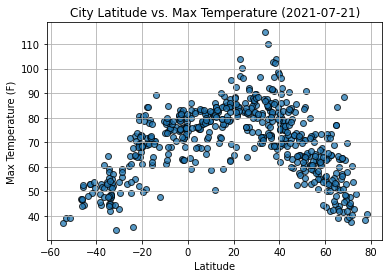

In [212]:
plt.scatter(summary_df.iloc[:, 1], summary_df.iloc[:, 3], edgecolors = "black", alpha = 0.75)
plt.title(f"City Latitude vs. Max Temperature ({today})")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid()

## Latitude vs. Humidity Plot

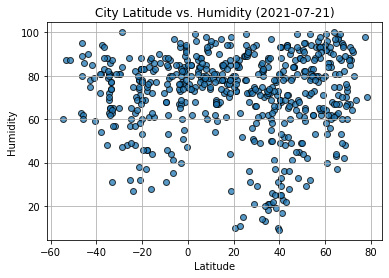

In [216]:
plt.scatter(summary_df.iloc[:, 1], summary_df.iloc[:, 4], edgecolors = "black", alpha = 0.75)
plt.title(f"City Latitude vs. Humidity ({today})")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid()

## Latitude vs. Cloudiness Plot

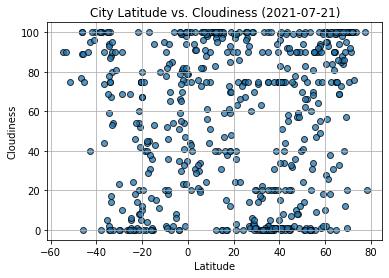

In [217]:
plt.scatter(summary_df.iloc[:, 1], summary_df.iloc[:, 5], edgecolors = "black", alpha = 0.75)
plt.title(f"City Latitude vs. Cloudiness ({today})")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid()

## Latitude vs. Wind Speed Plot

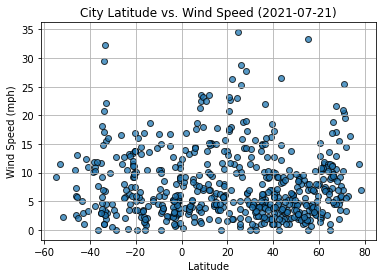

In [219]:
plt.scatter(summary_df.iloc[:, 1], summary_df.iloc[:, 6], edgecolors = "black", alpha = 0.75)
plt.title(f"City Latitude vs. Wind Speed ({today})")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


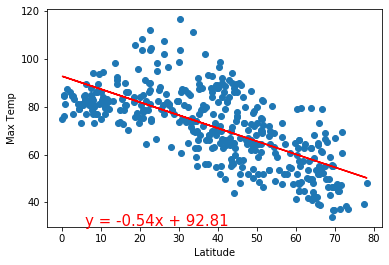

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


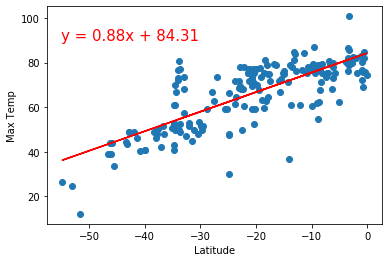

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


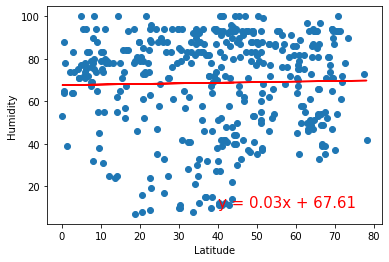

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


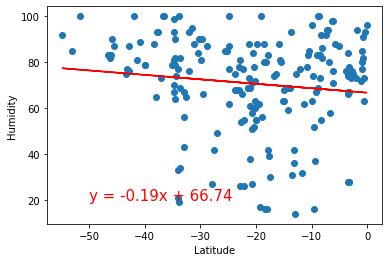

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


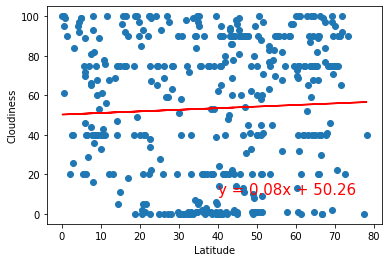

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


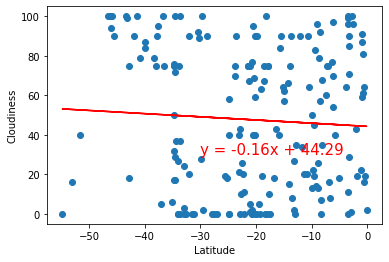

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


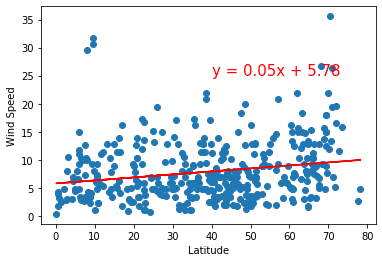

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


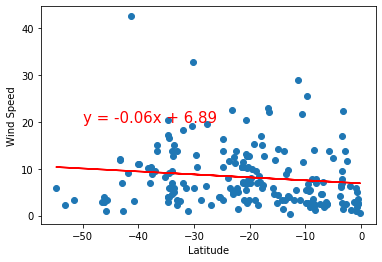